# Predicting energy consumption based on weather data

### Introduction

The objective of this project is to build a model which is capable of predicting the expected energy consumption level based on weather data. Therefore a dataset which contains energy and weather data should be used, in order to detect and show possible corelations between weather data and energy demand. 

### The dataset
The dataset contains the following fields attributes:
- timestamp
- air_pressure[mmHg]
- air_temerature[degree celcius]
- relative_humudity[%]
- wind_speed[m/s]
- solar_irridiation[W/m^2]
- electricity_demand_values[kw]
- heat_demand_values[kw]

The dataset contains electrical and heat demand as well as weather data from december 2010 until november 2018 with an hourly resolution. It is critical to have fine-grained data points over a longer period of time in order to determine correlations between weather and energy demand. Furthermore, the energy demand data and weather data should not be spread across a wide geographical area, since discrepancies between the weather are more likely to occur and the quality of the data for training and evaluating the model are rapidly declining.

## Goals

For a better understanding of the dataset, a explorative data analysis will be done. The goal of this analysis is to detect which features correlate **strongly** with energy demand and which features *may* be less relevant.

In addition a model will be trained and evaluated, in order to gain insights wether weather data is suitable for predicting the energy demand or not.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("./data/Load_data_new.csv")

# Data Analysis

In [30]:
df.describe()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw]
count,69934.000000,69903.000000,69903.000000,69125.000000,70080.000000,70073.000000,70073.000000
mean,734.588143,17.871834,60.644178,4.828268,257.293094,393.888975,263.506355
std,5.011322,10.683280,22.007274,2.598960,258.725788,239.189061,314.704564
min,716.500000,-14.400000,4.000000,0.000000,0.000000,112.947618,0.000000
25%,731.400000,10.000000,43.000000,3.000000,0.000000,227.707914,0.000000
50%,734.200000,18.900000,61.000000,5.000000,299.500000,323.093703,137.281603
75%,737.500000,25.600000,79.000000,6.000000,499.000000,476.911512,448.289876
max,757.500000,43.300000,100.000000,26.000000,699.000000,1592.893206,1529.168786


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             70080 non-null  object 
 1   air_pressure[mmHg]               69934 non-null  float64
 2   air_temperature[degree celcius]  69903 non-null  float64
 3   relative_humidity[%]             69903 non-null  float64
 4   wind_speed[M/S]                  69125 non-null  float64
 5   solar_irridiation[W/m²]          70080 non-null  int64  
 6   total_cloud_cover[from ten]      69837 non-null  object 
 7   electricity_demand_values[kw]    70073 non-null  float64
 8   heat_demand_values[kw]           70073 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.8+ MB


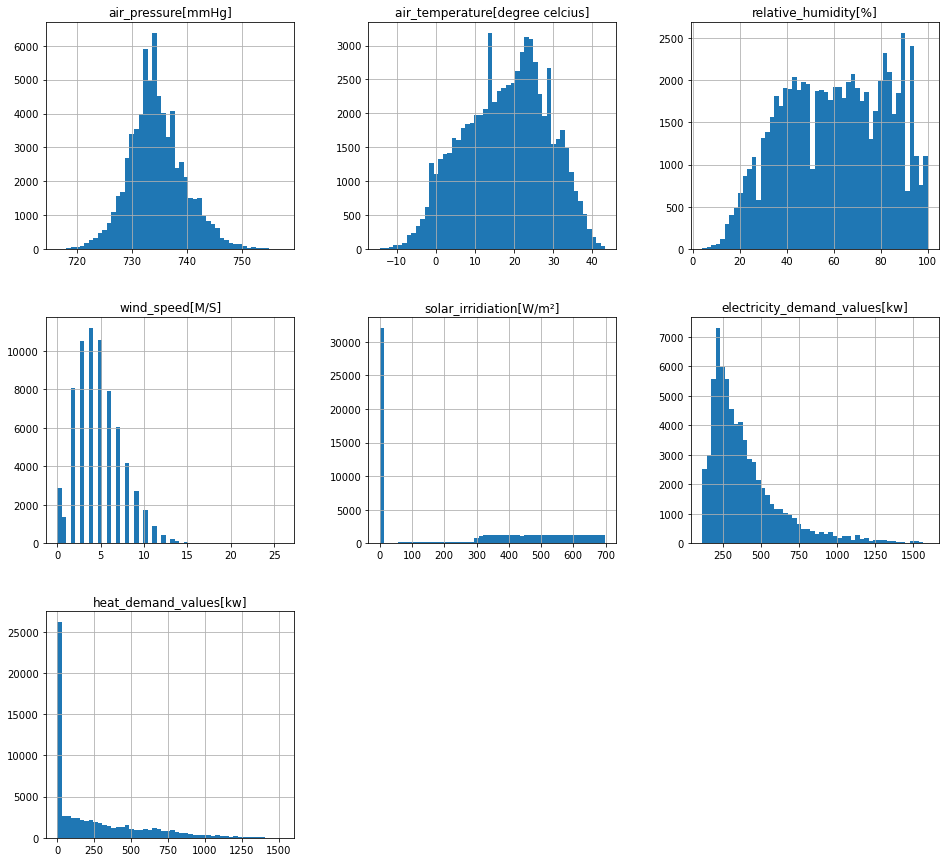

In [32]:
df.hist(bins=50, figsize=(16,15))
plt.show()

## Data Exploration

In [33]:
df

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
0,2010-12-01 00:00:00,729.7,25.0,85.0,5.0,0,no clouds,289.567557,432.940036
1,2010-12-01 01:00:00,729.4,27.8,77.0,7.0,0,no clouds,260.168520,473.935901
2,2010-12-01 02:00:00,728.9,33.3,62.0,7.0,0,2/10–3/10.,247.273585,483.278761
3,2010-12-01 03:00:00,731.6,32.2,62.0,2.0,0,5/10.,257.955878,545.921252
4,2010-12-01 04:00:00,732.6,22.8,96.0,3.0,0,2/10–3/10.,258.255081,550.526112
...,...,...,...,...,...,...,...,...,...
70075,2018-11-28 19:00:00,733.3,24.4,60.0,3.0,262,no clouds,379.637300,626.192823
70076,2018-11-28 20:00:00,733.6,27.8,56.0,4.0,0,no clouds,369.976634,609.519358
70077,2018-11-28 21:00:00,732.1,38.3,22.0,0.0,0,no clouds,365.009491,571.465130
70078,2018-11-28 22:00:00,735.3,36.7,25.0,4.0,0,no clouds,396.966494,583.703242


In [34]:
# Find NaN values in dataset to improve dataset quality.
df[df.isna().any(axis=1)]

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
130,2010-12-06 10:00:00,733.1,33.3,46.0,NaN,588,no clouds,333.817990,484.556708
375,2010-12-16 15:00:00,NaN,7.2,93.0,3.0,384,10/10.,375.382404,588.543953
376,2010-12-16 16:00:00,NaN,11.1,72.0,2.0,663,5/10.,451.820884,592.192796
613,2010-12-26 13:00:00,733.6,-2.2,96.0,7.0,600,NaN,381.252778,712.248685
1249,2011-01-22 01:00:00,736.8,20.6,93.0,9.0,0,NaN,290.154445,610.812280
...,...,...,...,...,...,...,...,...,...
68896,2018-10-10 16:00:00,728.6,19.0,94.0,4.0,460,NaN,244.096178,114.866493
69044,2018-10-16 20:00:00,NaN,5.0,70.0,5.0,0,no clouds,228.941001,81.630709
69046,2018-10-16 22:00:00,740.8,12.8,31.0,NaN,0,2/10–3/10.,258.874965,84.774228
69150,2018-10-21 06:00:00,743.2,10.0,26.0,NaN,0,7/10 – 8/10.,267.464345,10.436845


In [35]:
# Reshape total_cloud_cover to float
cloud_mapping = {
    'no clouds': 0,
    'Sky obscured by fog and/or other meteorological phenomena.': 0,
    'nan': 0,
    '2/10–3/10.': 0.25,
    '5/10.': 0.5,
    '10/10.': 1.0,
    '7/10 – 8/10.': 0.75,
    '4/10.': 0.4   
}
df["total_cloud_cover_numeric[from ten]"] = df["total_cloud_cover[from ten]"].apply(lambda x: cloud_mapping.get(x))
df["total_cloud_cover_numeric[from ten]"].fillna(value=0, inplace=True)

## Data cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time                                 70080 non-null  object 
 1   air_pressure[mmHg]                   69934 non-null  float64
 2   air_temperature[degree celcius]      69903 non-null  float64
 3   relative_humidity[%]                 69903 non-null  float64
 4   wind_speed[M/S]                      69125 non-null  float64
 5   solar_irridiation[W/m²]              70080 non-null  int64  
 6   total_cloud_cover[from ten]          69837 non-null  object 
 7   electricity_demand_values[kw]        70073 non-null  float64
 8   heat_demand_values[kw]               70073 non-null  float64
 9   total_cloud_cover_numeric[from ten]  70080 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.3+ MB


In [37]:
def plot_time_series(df: pd.DataFrame, x="Time", y="", figsize=(20, 10), title="Time series") -> None:
    df[[x, y]].plot(kind="line", figsize=figsize)

In [38]:
df.isna().sum()

Time                                     0
air_pressure[mmHg]                     146
air_temperature[degree celcius]        177
relative_humidity[%]                   177
wind_speed[M/S]                        955
solar_irridiation[W/m²]                  0
total_cloud_cover[from ten]            243
electricity_demand_values[kw]            7
heat_demand_values[kw]                   7
total_cloud_cover_numeric[from ten]      0
dtype: int64

In [39]:
df_inter = df[df.isna().any(axis=1)]
df_inter.isna().sum()

Time                                     0
air_pressure[mmHg]                     146
air_temperature[degree celcius]        177
relative_humidity[%]                   177
wind_speed[M/S]                        955
solar_irridiation[W/m²]                  0
total_cloud_cover[from ten]            243
electricity_demand_values[kw]            7
heat_demand_values[kw]                   7
total_cloud_cover_numeric[from ten]      0
dtype: int64

**Note**: 
- NaN values for air_pressure, air_temperatur, relative_humidity are values which can be derived from previous and following values since radical inclines/declines in those features are not likely. 
- NaN values for wind speed and total cloud cover will be replaced with 0. 
- Also: cloud cover will be transformed to numeric values for better results when training the model.

In [40]:
# Interpolation of derivable values
df["air_pressure[mmHg]"].interpolate(inplace=True)
df["air_temperature[degree celcius]"].interpolate(inplace=True)
df["relative_humidity[%]"].interpolate(inplace=True)

In [41]:
# Combine similar windspeed categories into one class
df["wind_speed_cat[M/S]"] = np.ceil(df["wind_speed[M/S]"])
df["wind_speed_cat[M/S]"].where(df["wind_speed[M/S]"] < 10, 10, inplace=True)

In [42]:
# Replace NaN for cloud_cover with 0
# Reshape total_cloud_cover to float
cloud_mapping = {
    'no clouds': 0,
    'Sky obscured by fog and/or other meteorological phenomena.': 0,
    'nan': 0,
    '2/10–3/10.': 0.25,
    '5/10.': 0.5,
    '10/10.': 1.0,
    '7/10 – 8/10.': 0.75,
    '4/10.': 0.4   
}
df["total_cloud_cover_numeric[from ten]"] = df["total_cloud_cover[from ten]"].apply(lambda x: cloud_mapping.get(x))
df["total_cloud_cover_numeric[from ten]"].fillna(value=0, inplace=True)

**Note**: wind_speed[M/S] & total_cloud_cover[from ten] were cleaned by adding further derived features.

## Checking for missing values

In [47]:
df_cleaned = df.copy()

In [53]:
df_cleaned.drop(columns=["wind_speed[M/S]", "total_cloud_cover[from ten]"], inplace=True)

In [56]:
# electricity_demand/heat_demand are not iterpolated.
df_cleaned.isnull().sum()

Time                                   0
air_pressure[mmHg]                     0
air_temperature[degree celcius]        0
relative_humidity[%]                   0
solar_irridiation[W/m²]                0
electricity_demand_values[kw]          7
heat_demand_values[kw]                 7
total_cloud_cover_numeric[from ten]    0
wind_speed_cat[M/S]                    0
dtype: int64

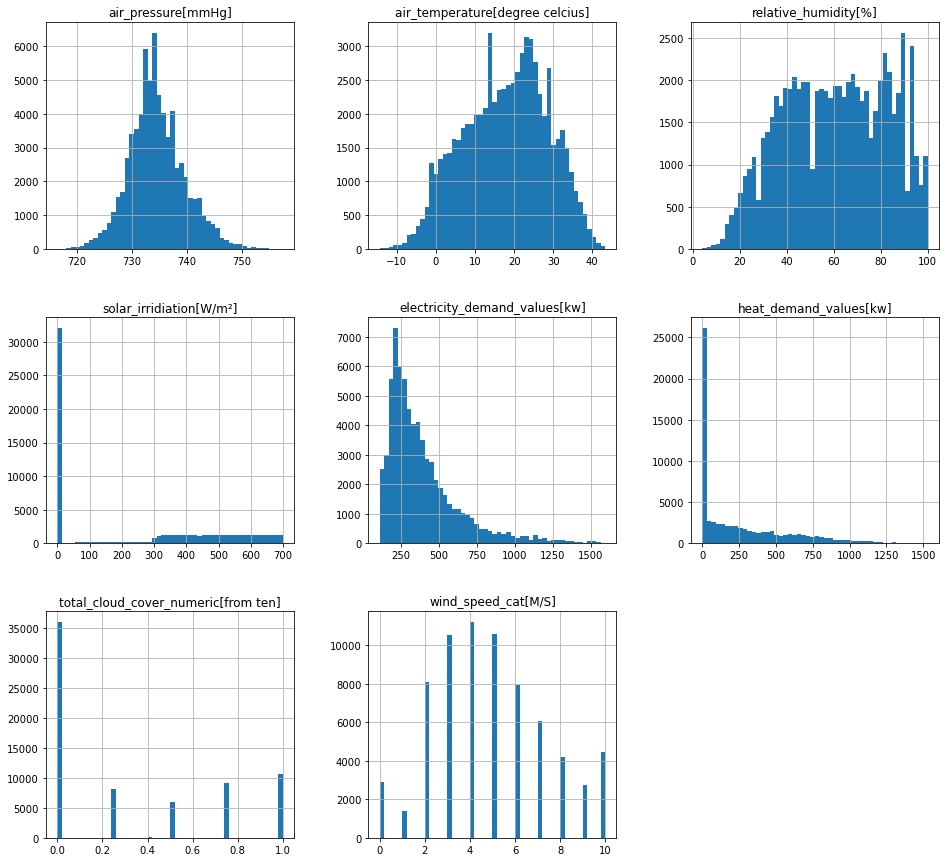

In [58]:
# Visualizing features to detect outliners
df_cleaned.hist(bins=50, figsize=(16,15))
plt.show()

In [59]:
df_cleaned.corr()

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover_numeric[from ten],wind_speed_cat[M/S]
air_pressure[mmHg],1.000000,-0.523761,0.056844,-0.001076,-0.008576,0.016396,0.024430,-0.237375
air_temperature[degree celcius],-0.523761,1.000000,-0.386589,0.001244,0.005712,-0.022747,-0.074381,0.180055
relative_humidity[%],0.056844,-0.386589,1.000000,0.000260,-0.030476,-0.008639,0.253775,-0.257087
solar_irridiation[W/m²],-0.001076,0.001244,0.000260,1.000000,-0.194220,0.038792,-0.004949,-0.001048
electricity_demand_values[kw],-0.008576,0.005712,-0.030476,-0.194220,1.000000,0.015911,-0.011118,0.005647
heat_demand_values[kw],0.016396,-0.022747,-0.008639,0.038792,0.015911,1.000000,0.011774,0.009740
total_cloud_cover_numeric[from ten],0.024430,-0.074381,0.253775,-0.004949,-0.011118,0.011774,1.000000,0.122706
wind_speed_cat[M/S],-0.237375,0.180055,-0.257087,-0.001048,0.005647,0.009740,0.122706,1.000000


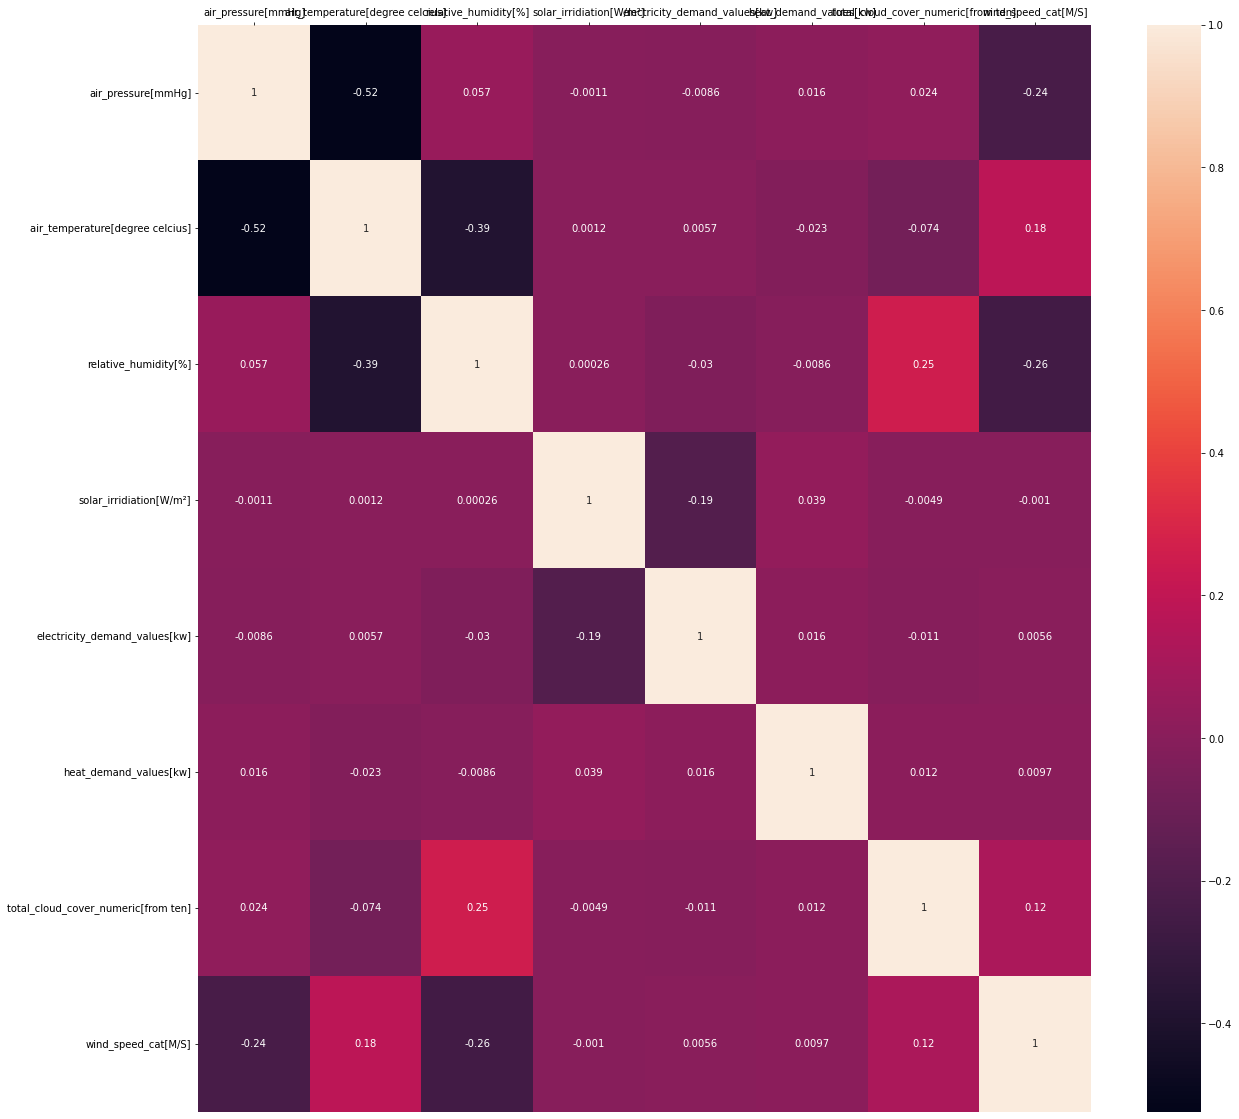

In [68]:
plt.figure(figsize=(20,20))
ax= sns.heatmap(df_cleaned.corr(), annot=True)
ax.xaxis.tick_top()
plt.show()

In [77]:
correlation_matrix = df_cleaned.corr()
correlation_matrix

,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],solar_irridiation[W/m²],electricity_demand_values[kw],heat_demand_values[kw],total_cloud_cover_numeric[from ten],wind_speed_cat[M/S]
air_pressure[mmHg],1.000000,-0.523761,0.056844,-0.001076,-0.008576,0.016396,0.024430,-0.237375
air_temperature[degree celcius],-0.523761,1.000000,-0.386589,0.001244,0.005712,-0.022747,-0.074381,0.180055
relative_humidity[%],0.056844,-0.386589,1.000000,0.000260,-0.030476,-0.008639,0.253775,-0.257087
solar_irridiation[W/m²],-0.001076,0.001244,0.000260,1.000000,-0.194220,0.038792,-0.004949,-0.001048
electricity_demand_values[kw],-0.008576,0.005712,-0.030476,-0.194220,1.000000,0.015911,-0.011118,0.005647
heat_demand_values[kw],0.016396,-0.022747,-0.008639,0.038792,0.015911,1.000000,0.011774,0.009740
total_cloud_cover_numeric[from ten],0.024430,-0.074381,0.253775,-0.004949,-0.011118,0.011774,1.000000,0.122706
wind_speed_cat[M/S],-0.237375,0.180055,-0.257087,-0.001048,0.005647,0.009740,0.122706,1.000000


In [78]:
# find strongest correlation for electricity_demand
print(correlation_matrix.iloc[4].sort_values(ascending = False))

electricity_demand_values[kw]          1.000000
heat_demand_values[kw]                 0.015911
air_temperature[degree celcius]        0.005712
wind_speed_cat[M/S]                    0.005647
air_pressure[mmHg]                    -0.008576
total_cloud_cover_numeric[from ten]   -0.011118
relative_humidity[%]                  -0.030476
solar_irridiation[W/m²]               -0.194220
Name: electricity_demand_values[kw], dtype: float64


**Note**: electricity_demand_values correlate the stronges with solar_irridiation[W/m²]. Explanation: If there is a higher solar_irridiation more electricity can be generated by solar panels & electricity demand reduces.

In [79]:
# find strongest correlation for heat_demand
print(correlation_matrix.iloc[5].sort_values(ascending=False))

heat_demand_values[kw]                 1.000000
solar_irridiation[W/m²]                0.038792
air_pressure[mmHg]                     0.016396
electricity_demand_values[kw]          0.015911
total_cloud_cover_numeric[from ten]    0.011774
wind_speed_cat[M/S]                    0.009740
relative_humidity[%]                  -0.008639
air_temperature[degree celcius]       -0.022747
Name: heat_demand_values[kw], dtype: float64


**Note**: heat_demand correlates the strongest with solar_iridiation[W/m²]. Explanation: If there is a higher solar_iridiation less heat is demanded. 